In [6]:
#import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,kpss  # Add kpss to the imports
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf 


from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error

In [3]:
#import the dataset
data = pd.read_csv("UNRATE_Diallo_Mamadou_Korka.csv")
data.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


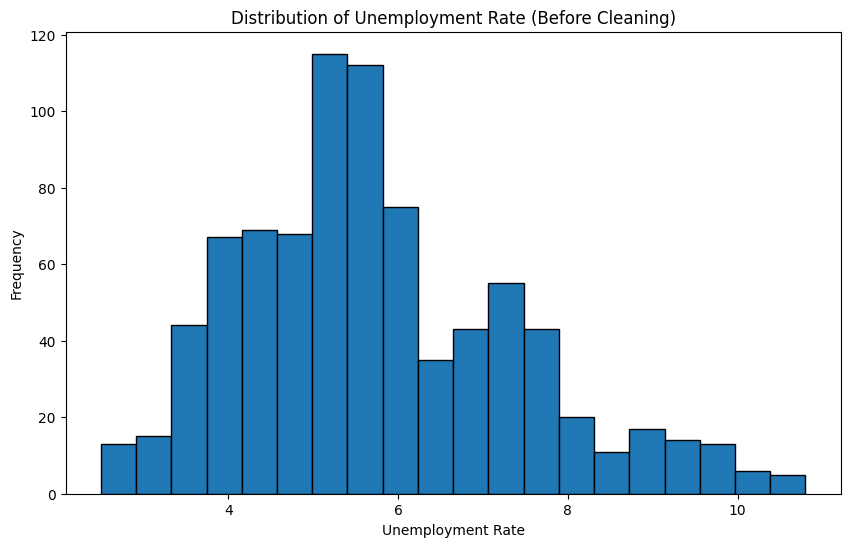

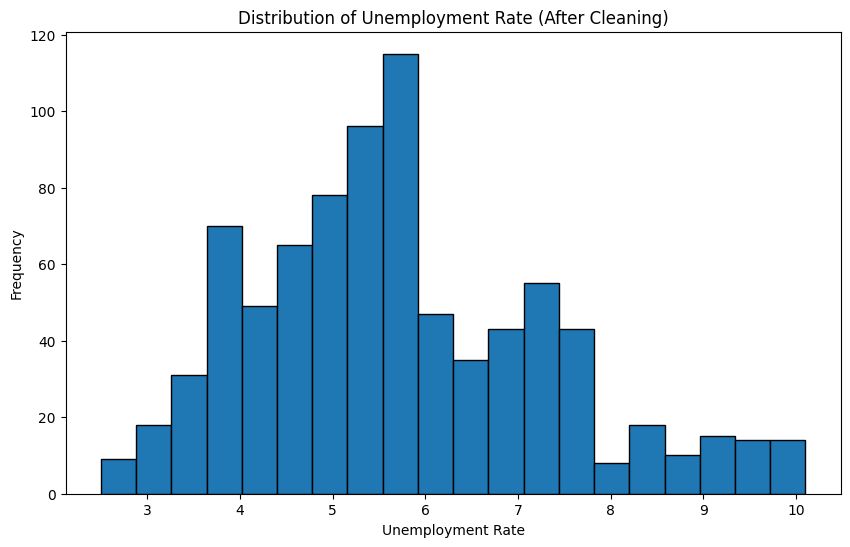


Analyze and Compare the distribution before and after cleaning, 
      and discuss the importance of the cleaning process:

### Analysis:

- **Before Cleaning:**
  - The distribution shows variation in counts across different bins.
  - Some bins have higher counts, indicating peaks or spikes in the data.
  - Presence of outliers might have influenced the distribution.

- **After Cleaning:**
  - The distribution appears to be smoother and more evenly spread.
  - Counts are more balanced across bins, suggesting a reduction in the impact of outliers.
  - The cleaning process may have helped in removing extreme values, resulting in a more representative distribution.

### Importance of Cleaning:

1. **Outlier Reduction:**
   - Cleaning helps in identifying and handling outliers, which can distort the distribution and affect statistical analyses.

2. **Improved Model Performance:**
   - Many statistical models, including time series models, perform better when trained on cleaner data witho

In [4]:
#Bonus(a)
# Convert the "DATE" column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Handle zero values ​​(replace with mean, for example)
data.fillna(data.mean(), inplace=True)

# Filter data for the time range from 1950 to 2029
data = data[(data['DATE'] >= '1950-01-01') & (data['DATE'] <= '2019-12-31')]

# Set the "DATE" column as the index
data.set_index('DATE', inplace=True)

# Bonus (a): Clean the data of outliers or breaks
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_cleaned

# Specify the column to clean (in this case, 'UNRATE')
column_to_clean = 'UNRATE'

# Visualize the distribution before cleaning
plt.figure(figsize=(10, 6))
counts_before, bins_before, _ = plt.hist(data[column_to_clean], bins=20, edgecolor='black')
plt.title('Distribution of Unemployment Rate (Before Cleaning)')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()


# Remove outliers using the IQR method
data_cleaned = remove_outliers_iqr(data, column_to_clean)

# Visualize the distribution after cleaning
plt.figure(figsize=(10, 6))
counts_after, bins_after, _ = plt.hist(data_cleaned[column_to_clean], bins=20, edgecolor='black')
plt.title('Distribution of Unemployment Rate (After Cleaning)')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()


print("""
Analyze and Compare the distribution before and after cleaning, 
      and discuss the importance of the cleaning process:

### Analysis:

- **Before Cleaning:**
  - The distribution shows variation in counts across different bins.
  - Some bins have higher counts, indicating peaks or spikes in the data.
  - Presence of outliers might have influenced the distribution.

- **After Cleaning:**
  - The distribution appears to be smoother and more evenly spread.
  - Counts are more balanced across bins, suggesting a reduction in the impact of outliers.
  - The cleaning process may have helped in removing extreme values, resulting in a more representative distribution.

### Importance of Cleaning:

1. **Outlier Reduction:**
   - Cleaning helps in identifying and handling outliers, which can distort the distribution and affect statistical analyses.

2. **Improved Model Performance:**
   - Many statistical models, including time series models, perform better when trained on cleaner data without the influence of extreme values.

3. **Enhanced Interpretability:**
   - A cleaner distribution makes it easier to interpret and draw meaningful insights from the data.

4. **Consistent Analysis:**
   - Cleaning ensures that your analysis is based on a more stable and representative dataset, leading to more reliable conclusions.

In summary, cleaning the data has likely contributed to a more stable and representative distribution, reducing the impact of outliers and improving the quality of your subsequent analyses and modeling efforts.
      
      """)

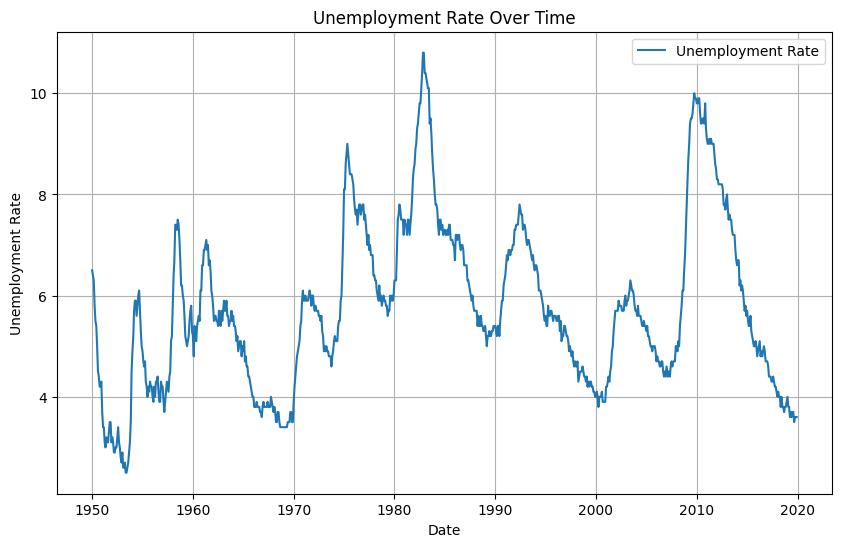

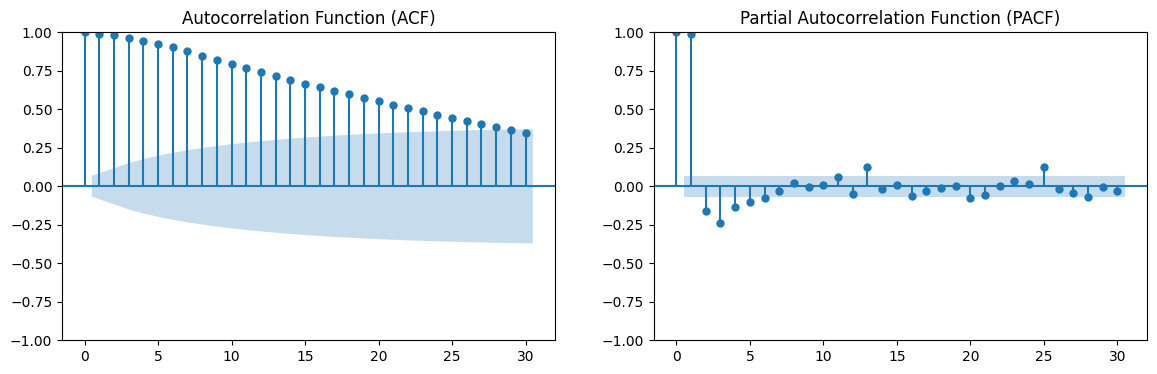

ADF Statistic: -2.9142173892323147
p-value: 0.043719512240750456
Critical Values: {'1%': -3.4382819390603068, '5%': -2.865041182894659, '10%': -2.568634324805645}
----------------------------------------------------------
KPSS Statistic: 0.48869071889330296
p-value: 0.0442138020510579
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is stationary. No differencing needed.


In [7]:
# Point 1: Decide Whether the Series is Stationary or Not

# Data Exploration and Visualization: Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(data['UNRATE'], label='Unemployment Rate')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()

# ACF and PACF Analysis (after cleaning)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(data_cleaned['UNRATE'], ax=ax1, lags=30)
ax1.set_title('Autocorrelation Function (ACF)')
plot_pacf(data_cleaned['UNRATE'], ax=ax2, lags=30)
ax2.set_title('Partial Autocorrelation Function (PACF)')
plt.show()

# Statistical Tests for Stationarity
# Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(data['UNRATE'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:', adf_result[4])

print("----------------------------------------------------------")
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
kpss_result = kpss(data['UNRATE'], regression='c')
print(f'KPSS Statistic: {kpss_result[0]}')
print(f'p-value: {kpss_result[1]}')
print('Critical Values:', kpss_result[3])

# Interpretation of Stationarity Tests
if adf_result[1] > 0.05:
    print("The series is likely non-stationary.")
    # Apply differencing
    data_diff = data['UNRATE'].diff().dropna()
    print("Differencing applied.")
else:
    print("The series is stationary. No differencing needed.")
    data_diff = data['UNRATE']

# Now you can proceed with further analysis using the data_diff series.


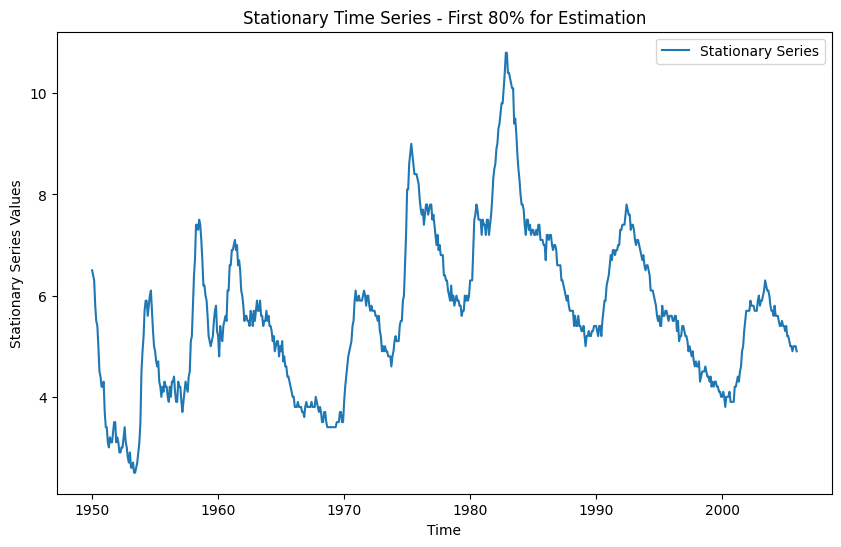

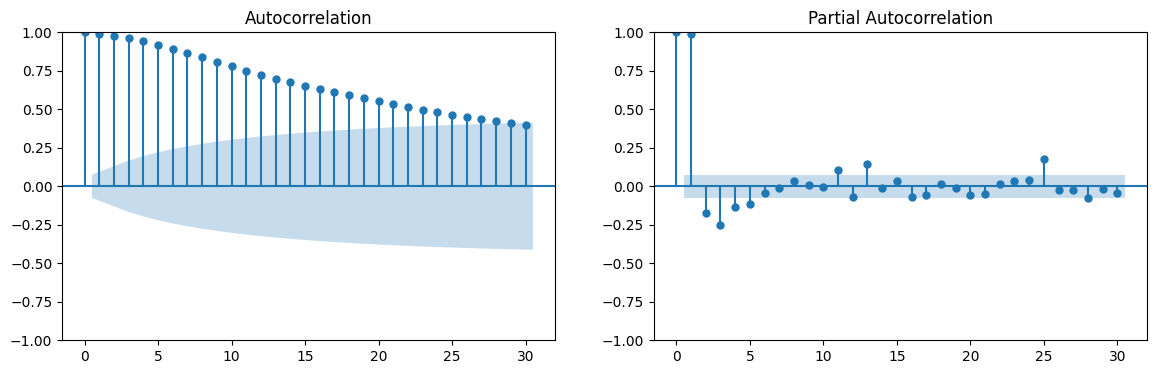

0


/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: Valu

Automatically selected order of AR component (p): 4


/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: Valu

Automatically selected order of MA component (q): 4


In [11]:
# Point 2: Select an Appropriate ARIMA Model

# Define the training dataset (first 80%)
train_size = int(len(data_diff) * 0.8)
train_set = data_diff[:train_size]

#Step 2: Visualize the Stationary Series
# Visualize the stationary series
plt.figure(figsize=(10, 6))
plt.plot(train_set, label='Stationary Series')
plt.title('Stationary Time Series - First 80% for Estimation')
plt.xlabel('Time')
plt.ylabel('Stationary Series Values')
plt.legend()
plt.show()

#Step 3: ACF and PACF Plots for Model Identification
# ACF and PACF plots for model identification
#plot_acf(train_set, lags=40, title='ACF - Stationary Series')
#plt.show()

#plot_pacf(train_set, lags=40, title='PACF - Stationary Series')
#plt.show()

# ACF and PACF Analysis (after cleaning)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(train_set, ax=ax1, lags=30)
plot_pacf(train_set, ax=ax2, lags=30)
plt.show()

#Step 4: ARIMA Model Selection

#Determine the order of differencing based on ADF test
adf_result_diff = adfuller(data_diff)
if adf_result_diff[1] > 0.05:
    d = 1  # Differencing needed
    print(d)
else:
    d = 0  # No differencing needed
    print(d)

# Calculate PACF
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the range of p values to consider
p_values = range(0, 5)

# Initialize variables
best_aic = float('inf')
best_p = 0

# Automated selection using AIC
for p in p_values:
    model = ARIMA(train_set, order=(p, 0, 0))
    try:
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_p = p
    except:
        pass

print(f"Automatically selected order of AR component (p): {best_p}")
p = best_p

from statsmodels.tsa.arima.model import ARIMA

# Define the range of q values to consider
q_values = range(0, 5)

# Initialize variables
best_aic = float('inf')
best_q = 0

# Automated selection using AIC
for q in q_values:
    model = ARIMA(train_set, order=(0, 0, q))
    try:
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_q = q
    except:
        pass

print(f"Automatically selected order of MA component (q): {best_q}")
q = best_q

 



In [12]:
##Step 4: ARIMA Model Selection
# Determine the order of differencing (d) based on visual inspection or ADF test
# If already differenced in Point 1, d=0

# Identify the order of the AR component (p) from PACF plot
# Identify the order of the MA component (q) from ACF plot

# Example:
#p = 1  # Adjust based on your analysis
#d = 0  # Adjust based on your analysis
#q = 1  # Adjust based on your analysis

# Fit ARIMA model
arima_model = ARIMA(train_set, order=(p, d, q))
arima_result = arima_model.fit()

# Display model summary
print(arima_result.summary())


/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 UNRATE   No. Observations:                  672
Model:                 ARIMA(4, 0, 4)   Log Likelihood                 184.565
Date:                Tue, 24 Oct 2023   AIC                           -349.129
Time:                        20:23:12   BIC                           -304.027
Sample:                    01-01-1950   HQIC                          -331.662
                         - 12-01-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6973      0.465     12.248      0.000       4.786       6.609
ar.L1          0.9073      0.070     12.957      0.000       0.770       1.045
ar.L2         -0.0025      0.099     -0.026      0.9

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


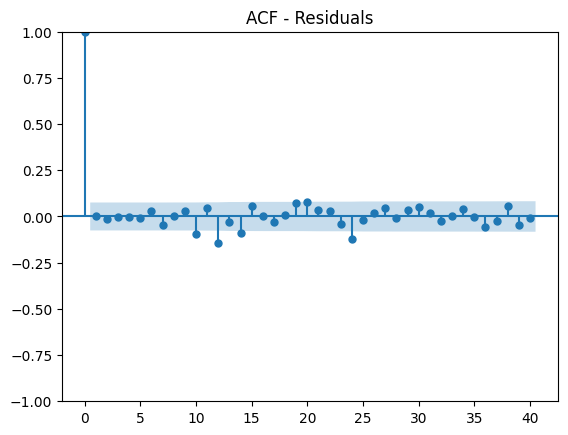

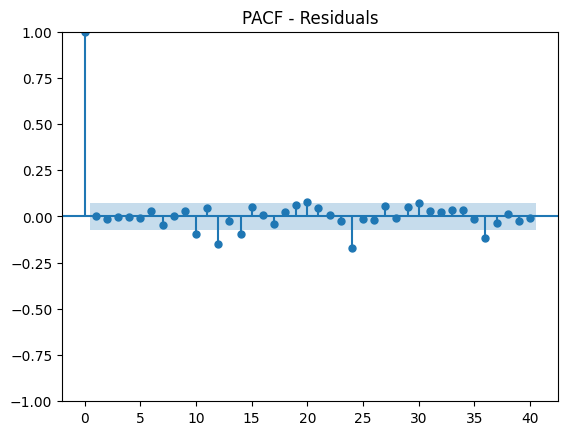

No p-values found in Ljung-Box test results. Check the length of lb_test.


In [16]:
#Step 5: Model Diagnostics and Justification
from statsmodels.stats.diagnostic import acorr_ljungbox
# Residuals analysis
residuals = arima_result.resid

# ACF and PACF plots of residuals
plot_acf(residuals, lags=40, title='ACF - Residuals')
plt.show()

plot_pacf(residuals, lags=40, title='PACF - Residuals')
plt.show()
# Perform Ljung-Box test for autocorrelation in residuals
lb_test = acorr_ljungbox(residuals, lags=[20])

# Check if there are p-values in the results
if len(lb_test) > 1 and len(lb_test[1]) > 0:
    p_value_lb = lb_test[1][0]
    print(f"Ljung-Box Test p-value: {p_value_lb}")
    
    # Justify the model choice based on diagnostic tests, AIC/BIC, and visual inspection
    # Adjust the model order if necessary and repeat the fitting process

    # Example justification (replace with your own):
    if p_value_lb > 0.05:
        print("The residuals do not show significant autocorrelation.")
        print("The ARIMA({},{},{}) model is a suitable choice.".format(p, d, q))
    else:
        print("Autocorrelation exists in the residuals.")
        print("Consider adjusting the model order or exploring other models")
else:
    print("No p-values found in Ljung-Box test results. Check the length of lb_test.")



In [18]:
# Point 3: One-Step-Ahead Forecasts


### Step 1: Load Necessary Libraries and Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming you have already loaded and preprocessed your data
# Use the stationary series obtained from Point 1
# For example, assuming 'train_set' is the stationary series from Point 2

### Step 2: Initialize Variables and Data Structures
# Initialize variables
predictions = []
true_values = []

# Length of the training set
train_size = len(train_set)

# Remaining 20% of the sample for forecasting
test_set = data_diff[train_size:]

### Step 3: Perform One-Step-Ahead Forecast with Expanding Window
# Loop through the test set for one-step-ahead forecasting
for t in range(len(test_set)):
    # Estimate the ARIMA model on the training set up to the current time step
    model = ARIMA(train_set[:train_size + t], order=(p, d, q))
    results = model.fit()

    # Forecast the next time step
    forecast = results.forecast(steps=1)

    # Append the forecasted value to the predictions list
    predictions.append(forecast[0])

    # Append the true value to the true_values list
    true_values.append(test_set.iloc[t])

# Convert lists to numpy arrays for easier calculation
predictions = np.array(predictions)
true_values = np.array(true_values)

### Step 4: Plot the Forecasts and True Values
plt.figure(figsize=(12, 6))
plt.plot(true_values, label='True Values', color='blue')
plt.plot(predictions, label='ARIMA Forecast', color='red', linestyle='dashed')
plt.title('ARIMA One-Step-Ahead Forecast with Expanding Window')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()

### Step 5: Calculate RMSE
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(true_values, predictions))
print(f"RMSE: {rmse}")

#This step-by-step guide assumes you have already estimated the ARIMA model parameters `(p, d, q)` 
#based on the analysis in Point 2. Adjust the code according to your specific dataset and model parameters.


/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipykernel_1637/1858584078.py:37: FutureWarning: Series.__getitem__ treating keys

In [ ]:
print("""

For the bonus points, you would need to handle outliers or breaks before Point 1 and explain the consequences 
in a separate code section. Additionally, choosing appropriate values for `p`, `d`, and `q` in the ARIMA model 
is crucial, and you might want to use model selection criteria for that.""")